In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [597]:
data=pd.read_csv('/content/synthetic_milkoutput_unique.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.8,34,1,0,1,0,252,high
1,6.7,39,1,0,1,0,250,low
2,7.0,51,1,1,0,1,241,medium
3,6.5,43,1,0,1,1,254,medium
4,7.4,83,0,1,0,1,241,low


In [598]:
data.shape

(2007, 8)

In [599]:
print("List of columns: \n",(data.columns))

List of columns: 
 Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [600]:
cat_cols = data.select_dtypes(include = 'object').columns.tolist()
num_cols = data.select_dtypes(exclude = 'object').columns.tolist()
print("Categorical Columns: \n", cat_cols)
print("Numerical Columns: \n", num_cols)

Categorical Columns: 
 ['Grade']
Numerical Columns: 
 ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']


In [601]:
print("Data Types: \n", data.dtypes)

Data Types: 
 pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object


In [602]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          2007 non-null   float64
 1   Temprature  2007 non-null   int64  
 2   Taste       2007 non-null   int64  
 3   Odor        2007 non-null   int64  
 4   Fat         2007 non-null   int64  
 5   Turbidity   2007 non-null   int64  
 6   Colour      2007 non-null   int64  
 7   Grade       2007 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 125.6+ KB


In [603]:
print('checking for duplicates records/rows: \n')
if data.duplicated().any():
  print('duplicates found')
else:
  print('no duplicates found')

checking for duplicates records/rows: 

duplicates found


In [604]:
print("Display Duplicate rows")
data[data.duplicated()]

Display Duplicate rows


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1030,6.8,34,0,0,0,1,240,medium
1057,6.6,43,0,0,0,1,250,medium
1058,9.5,42,0,0,1,0,248,medium
1059,6.8,34,1,0,1,0,252,high
1060,6.7,39,1,0,1,0,250,low
...,...,...,...,...,...,...,...,...
2002,9.5,43,1,0,1,0,241,high
2003,6.9,34,0,0,1,1,254,medium
2004,7.1,34,1,0,1,0,255,low
2005,6.8,34,1,1,0,1,243,medium


In [605]:
print('Drop Duplicate')
data1 = data.drop_duplicates()
data1.shape

Drop Duplicate


(1056, 8)

In [606]:
print("checking for missing values in dataset")
data.isnull().sum()

checking for missing values in dataset


,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [607]:

data.describe()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,7.013951,39.653214,0.440458,0.396612,0.591430,0.427005,246.721475
std,0.886278,7.589106,0.496566,0.489316,0.491692,0.494766,5.674948
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.600000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
50%,6.900000,37.000000,0.000000,0.000000,1.000000,0.000000,246.000000
75%,7.100000,43.000000,1.000000,1.000000,1.000000,1.000000,253.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [608]:
data.groupby('Grade').mean().T

Grade,high,low,medium
pH,7.049755,7.013131,6.989989
Temprature,40.088091,40.567677,38.853170
Taste,0.446982,0.412121,0.451613
Odor,0.464927,0.404040,0.345940
Fat,0.593801,0.602020,0.583982
Turbidity,0.451876,0.440404,0.402670
Colour,246.569331,246.327273,247.042269


In [609]:
print('Unique values')
for col in data.columns:
  print(data[col].value_counts())
  print("--------------------------")
  print("")

Unique values
pH
6.9    306
7.0    226
6.8    223
7.1    218
6.6    179
6.7    151
6.5    145
9.5    100
7.2     87
6.4     69
6.3     39
6.2     24
9.0     18
8.9     14
7.9     14
8.5     14
7.3     10
8.7     10
9.2      8
3.0      8
7.7      8
8.4      8
7.4      8
8.0      8
8.8      8
9.3      6
7.5      6
8.2      6
7.6      6
5.3      6
8.6      6
8.1      5
5.5      5
6.1      4
4.9      4
5.1      4
9.1      4
7.8      4
9.4      4
4.7      3
3.6      2
4.4      2
5.7      2
5.8      2
5.4      2
4.1      2
6.0      2
3.4      2
4.8      2
3.9      2
5.2      2
4.3      2
3.7      2
4.6      2
4.5      2
5.6      1
Name: count, dtype: int64
--------------------------

Temprature
34    707
38    119
36    115
35    102
37    102
40     94
43     91
39     86
42     81
41     80
45     64
44     56
46     42
47     38
49     34
50     32
48     28
52     20
51     20
53     14
55     14
54     10
66      7
61      6
65      5
70      4
71      4
86      4
67      4
56      4
83

In [610]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

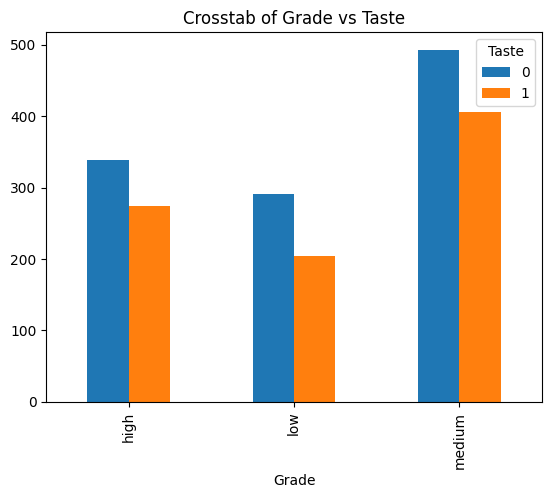

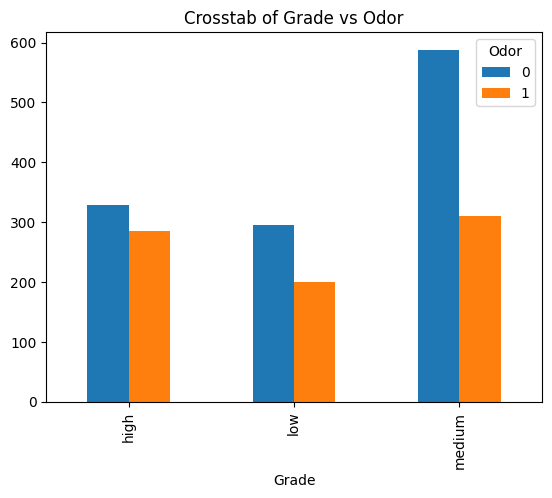

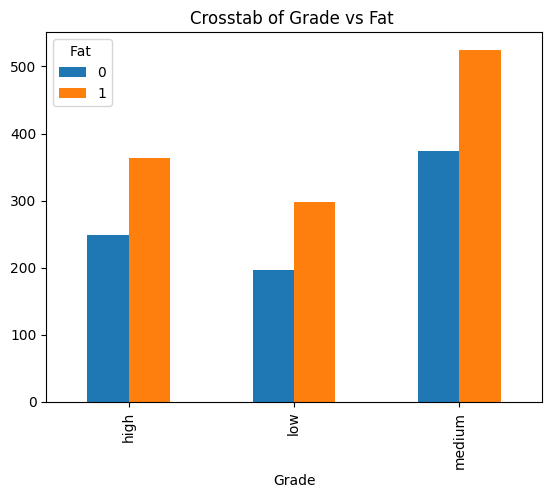

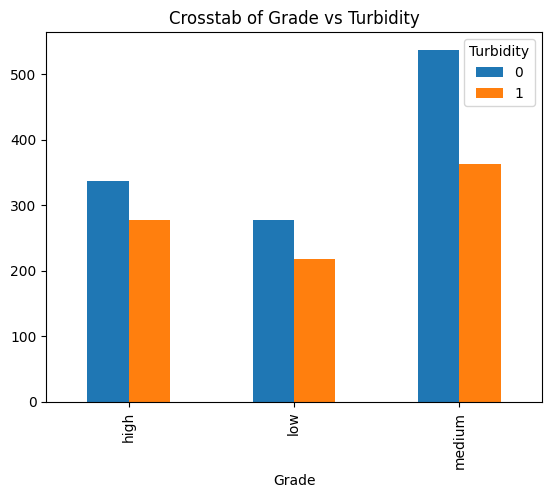

In [611]:
cols = ['Taste', 'Odor', 'Fat ', 'Turbidity'] # Make sure 'Fat ' matches column name
for col in cols:
    # Changed 'corsstab' to 'crosstab'
    pd.crosstab(data.Grade, data[col]).plot(kind='bar')
    plt.title(f'Crosstab of Grade vs {col}') # Adding a title for clarity
    plt.show() # Displaying each plot separately

In [612]:
data['Grade'].value_counts()

,count
Grade,
medium,899
high,613
low,495


<Axes: xlabel='Grade'>

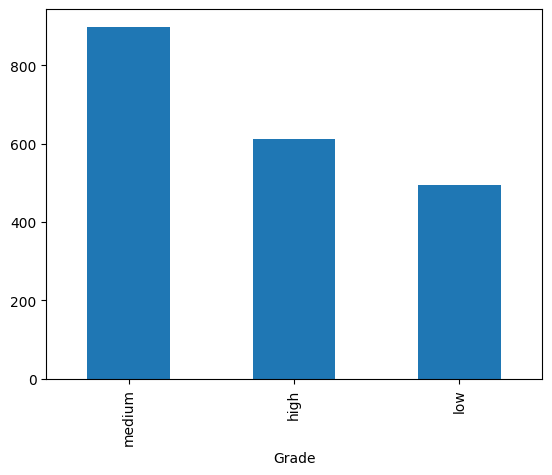

In [613]:
data['Grade'].value_counts().plot(kind = 'bar')

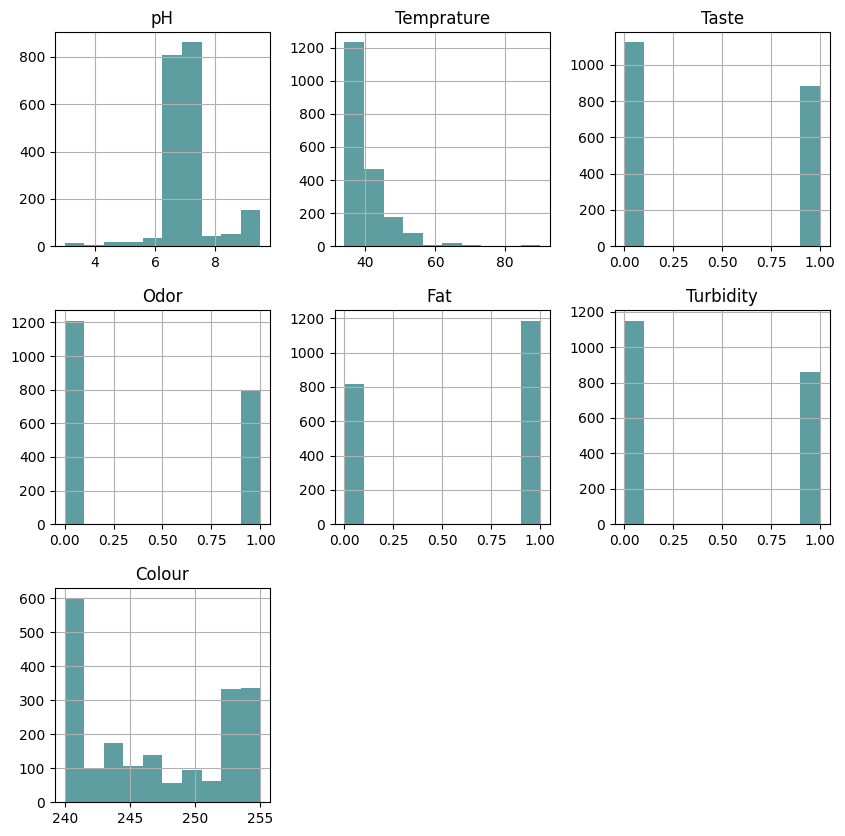

In [614]:
data_hist_plot = data.hist(figsize = (10,10), color = "#5F9EA0")

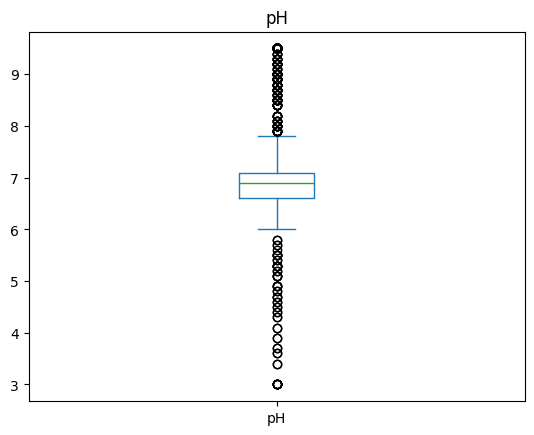

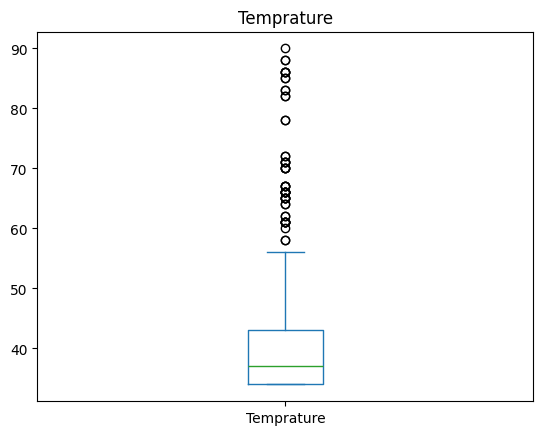

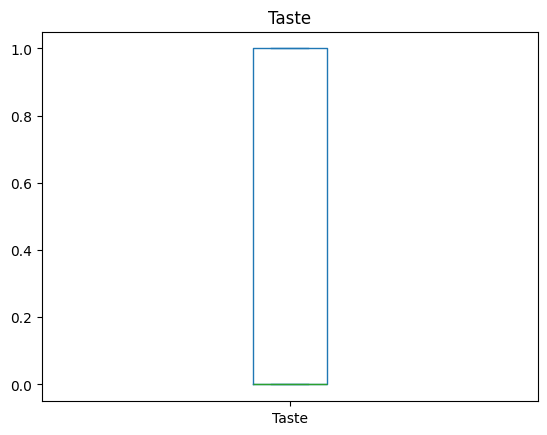

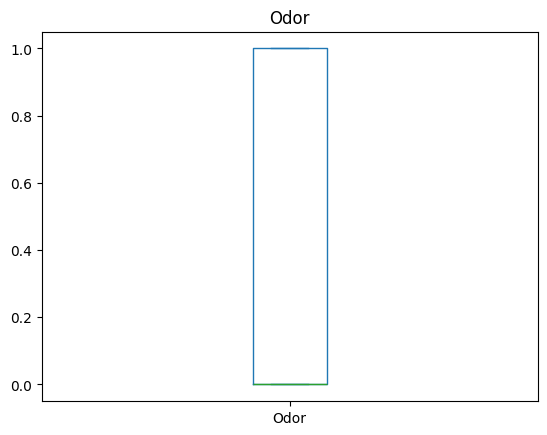

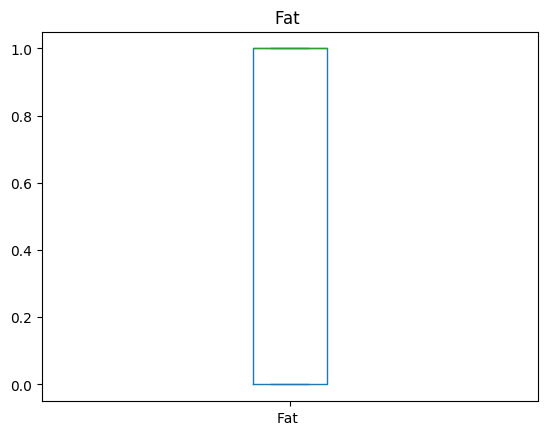

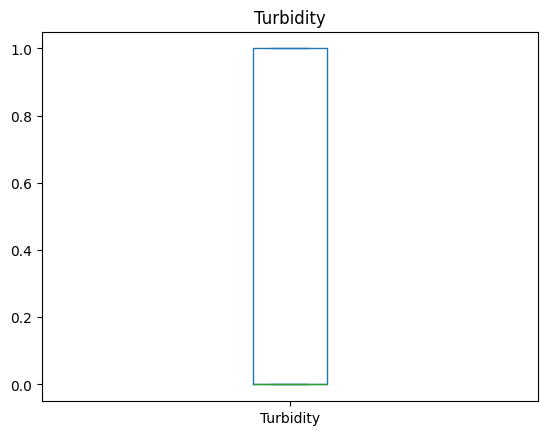

In [615]:
# Assuming 'pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', and potentially other columns from data are your numerical features
num_cols = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity'] # Add other numerical column names as needed

for col in num_cols:
  data[col].plot(kind= 'box')
  plt.title(col)
  plt.show()

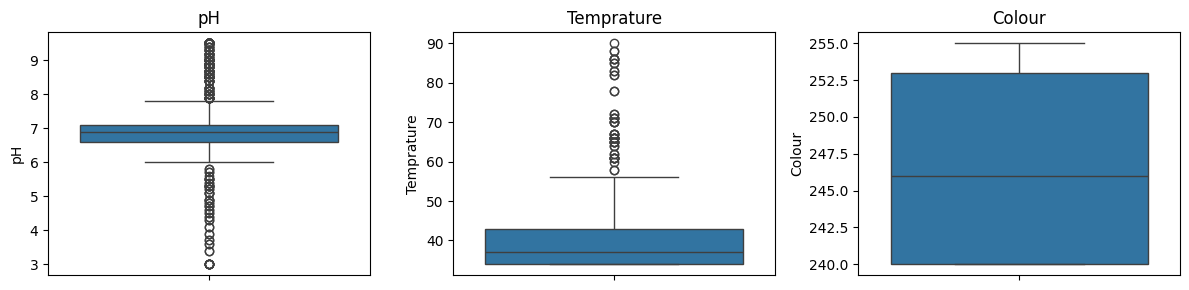

In [616]:
cols = ['pH','Temprature','Colour']
fig, axes = plt.subplots(ncols = 3, figsize=(12, 3))
for column,axis in zip(cols, axes):
  sns.boxplot(data = data[column],ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

In [617]:
print('convert Target variable [Grade] into Numbers')
print("low = 0, medium = 1, high = 2")

convert Target variable [Grade] into Numbers
low = 0, medium = 1, high = 2


In [618]:
def grade_label(x):
  if x == 'high':
    return 2
  elif x == 'medium':
    return 1
  else:
    return 0

data['Grade'] = data['Grade'].apply(lambda x: grade_label(x))

print("Target variable after encoding")
data.head()

Target variable after encoding


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.8,34,1,0,1,0,252,2
1,6.7,39,1,0,1,0,250,0
2,7.0,51,1,1,0,1,241,1
3,6.5,43,1,0,1,1,254,1
4,7.4,83,0,1,0,1,241,0


In [619]:
print("x-Features and y-Lables")
x = data.drop('Grade', axis = 1)
y = data['Grade']
print(x.head())
print("")
print("y-label")
print(y.head())

x-Features and y-Lables
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  6.8          34      1     0     1          0     252
1  6.7          39      1     0     1          0     250
2  7.0          51      1     1     0          1     241
3  6.5          43      1     0     1          1     254
4  7.4          83      0     1     0          1     241

y-label
0    2
1    0
2    1
3    1
4    0
Name: Grade, dtype: int64


In [620]:
print('splitting the dat into training and testing')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42,stratify=y)
print("Training size = ", x_train.shape)
print("Testing size = ", x_test.shape)


splitting the dat into training and testing
Training size =  (1404, 7)
Testing size =  (603, 7)


In [621]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

In [622]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [623]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
MNB = MultinomialNB()
ABC = AdaBoostClassifier()

In [624]:

import warnings
warnings.filterwarnings('ignore')

models = [LR, DT, RF, ETC, SVM, KNN, GBC, ABC, MNB]
features = x  # Use the original 'x' variable which contains your features
labels = y
CV = 5
accu_list = []
ModelName = []

for model in models:
    model_name = type(model).__name__  # Correct way to get model name
    try:
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        accu_list.append(accuracies.mean() * 100)  # Use accuracies.mean() instead of accuracies.meanI()
        ModelName.append(model_name)
    except ValueError as e:
        print(f"Model {model_name} failed due to: {e}")
        accu_list.append(np.nan)  # Append NaN for failed models
        ModelName.append(model_name)

model_acc_data = pd.DataFrame({"Model": ModelName, "Cross_Val_Accuracy": accu_list})
model_acc_data = model_acc_data.sort_values(by='Cross_Val_Accuracy', ascending=False)
model_acc_data  # This line should be outside the loop to print the final result

,Model,Cross_Val_Accuracy
2,RandomForestClassifier,92.325529
1,DecisionTreeClassifier,92.325281
3,ExtraTreesClassifier,92.175531
6,GradientBoostingClassifier,53.860746
5,KNeighborsClassifier,51.917594
0,LogisticRegression,45.739755
7,AdaBoostClassifier,45.191871
8,MultinomialNB,45.141748
4,SVC,44.793241


In [625]:
print("best Model with Highest Accuracy")
print(f"{model_acc_data.iloc[0,0]} with {round(model_acc_data.iloc[0,1], 2)} % Accuracy")

best Model with Highest Accuracy
RandomForestClassifier with 92.33 % Accuracy


<Axes: >

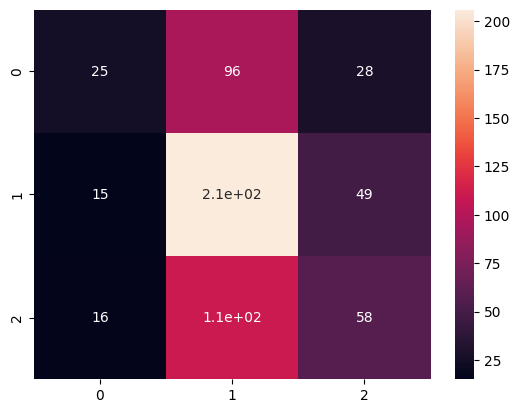

In [594]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [595]:
sample_data_1 = {6.5, 35, 1, 0, 1, 0, 254}
sample_data_0 = {9.5, 34, 1, 1, 0, 1, 255}
sample_data_1 = {6.6, 37, 0, 0, 0, 0, 255}


In [ ]:
ph = float(input("Enter the pH value: "))
temp = float(input("Enter the Temperature value: "))
taste = float(input("Enter the Taste : "))
odor = float(input("Enter the Odor : "))
fat = float(input("Enter the Fat : "))
turb = float(input("Enter the Turbidity : "))
color = float(input("Enter the Color : "))

Enter the pH value: 6.5
Enter the Temperature value: 35
Enter the Taste : 1
Enter the Odor : 0
Enter the Fat : 1
Enter the Turbidity : 0
Enter the Color : 254


In [ ]:
input_data = [ph, temp, taste, odor, fat, turb, color]
prediction = GBC.predict([input_data])
if prediction[0] == 2:
  print("Milk is of 'HIGH GRADE'")
elif prediction[0] == 1:
  print("Milk is of 'AVERAGE GRADE'")
else:
  print("Milk is of 'LOW GRADE'")

Milk is of 'AVERAGE GRADE'
